<font color='green'>
    <h1> <b>
 Web Scraping
        </b> </h1>
</font>
<br />
<font color='black'>
    <h3>
 Working on Textual data to understand the overall conditions related to the company.
    </h3>
    </font>

In [1]:
import requests
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
from html.parser import HTMLParser

import bs4 as bs
import urllib.request
import re
import string

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DIPTASHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
r=requests.get('https://www.stericycle.com/terms-and-conditions')

In [3]:
r.encoding = 'utf-8'

In [4]:
html = r.text

In [5]:
print(html[:500])

<!DOCTYPE html>
<html lang="en" xml:lang="en">
<head id="head"><title>
	Terms and Conditions - Stericycle
</title><meta charset="UTF-8" /> 
<meta name="viewport" content="width=device-width, initial-scale=1 , min-scale=1, max-scale=1" />
<meta name="msvalidate.01" content="27084434C22511615A9DDDAEE323CEC1" />
<meta http-equiv="X-UA-Compatible" content="IE=edge" />
<link href="/CMSPages/GetResource.ashx?stylesheetname=Bootstrap.min" rel="stylesheet" type="text/css" media="screen" />
<link


In [6]:
soup = BeautifulSoup(html)


In [7]:
text = soup.get_text()

In [8]:
len(text)

19872

In [9]:
text=text[17300:31000]

In [10]:
text_nopunct=''

text_nopunct= "".join([char for char in text if char not in string.punctuation])

In [11]:
len(text_nopunct)

2172

In [12]:
text_nopunct[500:1500]

'Products  Supplies\n\n\n\nSecure Information Destruction\n\n\n\nEnviromental Solutions\n\n\n\nSustainability Services\n\n\n\n\n\n\nReturn to service list\n\n\n\xa0\n\n\n\n\n\r\n    function \r\n    var didInit  false\r\n    function initMunchkin \r\n    ifdidInit  false \r\n    didInit  true\r\n    Munchkininit929OAW854\r\n    \r\n    \r\n    var s  documentcreateElementscript\r\n    stype  textjavascript\r\n    sasync  true\r\n    ssrc  munchkinmarketonetmunchkinjs\r\n    sonreadystatechange  function \r\n    if thisreadyState  complete  thisreadyState  loaded \r\n    initMunchkin\r\n    \r\n    \r\n    sonload  initMunchkin\r\n    documentgetElementsByTagNamehead0appendChilds\r\n    \r\n\n\n\n\r\n  function setCookiename value days\r\n      var date new Date\r\n      datesetTimedategetTime  days2460601000\r\n      var expires  expires  datetoGMTString\r\n      documentcookie name    value  expires  path\r\n  \r\n  function getParamp\r\n      var match RegExp  p  execwindowlocationse

In [13]:
text_nopunct=text_nopunct.strip('\n')
text_nopunct=text_nopunct.strip('\n\n')
text_nopunct=text_nopunct.strip('\n\n\n')

In [14]:
text_nopunct[500:1500]

'Products  Supplies\n\n\n\nSecure Information Destruction\n\n\n\nEnviromental Solutions\n\n\n\nSustainability Services\n\n\n\n\n\n\nReturn to service list\n\n\n\xa0\n\n\n\n\n\r\n    function \r\n    var didInit  false\r\n    function initMunchkin \r\n    ifdidInit  false \r\n    didInit  true\r\n    Munchkininit929OAW854\r\n    \r\n    \r\n    var s  documentcreateElementscript\r\n    stype  textjavascript\r\n    sasync  true\r\n    ssrc  munchkinmarketonetmunchkinjs\r\n    sonreadystatechange  function \r\n    if thisreadyState  complete  thisreadyState  loaded \r\n    initMunchkin\r\n    \r\n    \r\n    sonload  initMunchkin\r\n    documentgetElementsByTagNamehead0appendChilds\r\n    \r\n\n\n\n\r\n  function setCookiename value days\r\n      var date new Date\r\n      datesetTimedategetTime  days2460601000\r\n      var expires  expires  datetoGMTString\r\n      documentcookie name    value  expires  path\r\n  \r\n  function getParamp\r\n      var match RegExp  p  execwindowlocationse

In [15]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [16]:
tokens = tokenizer.tokenize(text_nopunct)

In [17]:
len(tokens)

191

In [18]:
print(tokens[0:20])

['ssibility', 'laws', 'and', 'regulations', 'if', 'you', 'use', 'a', 'screen', 'reader', 'and', 'need', 'help', 'with', 'this', 'website', 'or', 'have', 'feedback', 'or']


In [19]:
words = []

for word in tokens:
    words.append(word.lower())

In [20]:
print(words[0:50])

['ssibility', 'laws', 'and', 'regulations', 'if', 'you', 'use', 'a', 'screen', 'reader', 'and', 'need', 'help', 'with', 'this', 'website', 'or', 'have', 'feedback', 'or', 'inquiries', 'about', 'accessing', 'material', 'on', 'this', 'website', 'because', 'of', 'a', 'disability', 'contact', 'accessibilitystericyclecom', 'our', 'policy', 'is', 'available', 'in', 'accessible', 'formats', 'upon', 'request', 'social', 'media', 'close', 'dialog', 'press', 'escape', 'to', 'close']


In [21]:
stopwords = nltk.corpus.stopwords.words('english')

In [22]:
words_new = []

for word in words:
    if word not in stopwords:
        words_new.append(word)

In [23]:
len(words_new)

161

In [24]:
from nltk.stem import WordNetLemmatizer 
  
wn = WordNetLemmatizer()

In [25]:
lem_words=[]

for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

In [26]:
len(lem_words)

161

In [27]:
same=0
diff=0

for i in range(0,161):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1

In [28]:
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 14
Number of words not Lemmatized= 147


In [29]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)

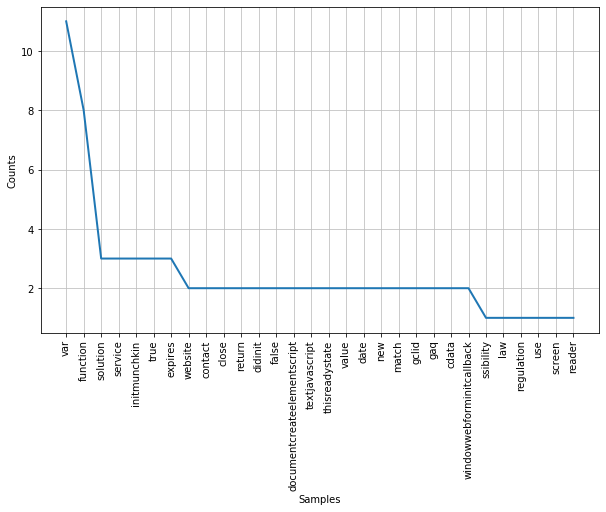

In [30]:
#Frequency Distribution Plot
plt.subplots(figsize=(10,6))
freq_dist.plot(30)

In [31]:
#converting into string

res=' '.join([i for i in lem_words if not i.isdigit()])


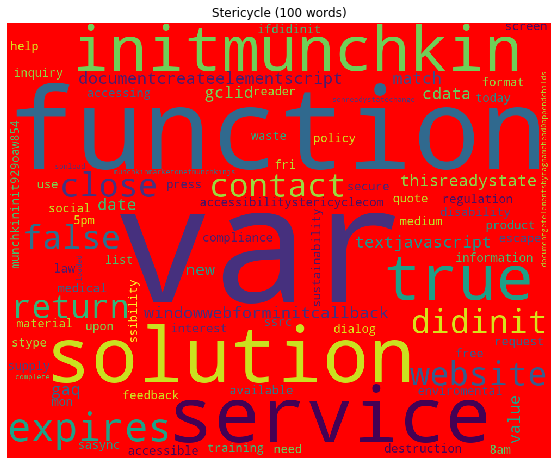

In [32]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='red',
                          max_words=80,
                          width=1000,
                          height=800
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('Stericycle (100 words)')
plt.axis('off')
plt.show()

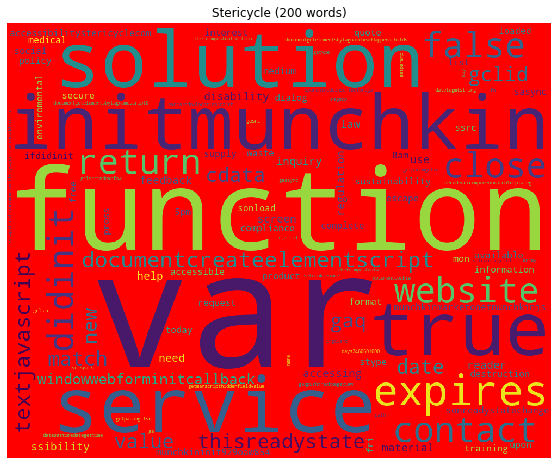

In [33]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='red',
                          max_words=120,
                          width=1000,
                          height=800
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('Stericycle (200 words)')
plt.axis('off')
plt.show()